# 1. Explotarory Data Analysis
* Structured and unstructured data
* Estimates of Location
* Estimates of Variability
* Exploring the Data Distribution
* Exploring Binary and Categorical Data
* Exploring Two or More variables

Also, topics to have on mind
* Misleading graph

## Import libraries

In [1]:
from scipy.stats import trim_mean
import pandas as pd
import numpy as np
import wquantiles

## Estimates of Location
    * Mean
    * Weighted mean
    * Median
    * Percentil
    * Weighted median
    * Trimmed Mean
    * Robust (Not sensitive to extreme values/outliers)

In [2]:
# Load the data
csv_path = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv'

state = pd.read_csv(csv_path)

# Estimate Population mean, trimmed mean, and median
print('Population')
print('Mean:', state['Population'].mean())
print('Trimmed mean:', trim_mean(state['Population'], 0.1))
print('Median:', state['Population'].median())

Population
Mean: 6162876.3
Trimmed mean: 4783697.125
Median: 4436369.5


**NOTE:** If we want to compute the average murder rate for the country, we need to use a *weighted mean or median* to account for *different
populations* in the states

In [3]:
# Mean and Weighted mean
print('Murder Rate')
print('Mean:', state['Murder.Rate'].mean())
print('Median:', state['Murder.Rate'].median())
print('Weighted mean:', np.average(state['Murder.Rate'], weights=state['Population']))
print('Weighted median:', wquantiles.median(state['Murder.Rate'], weights=state['Population']))

Murder Rate
Mean: 4.066
Median: 4.0
Weighted mean: 4.445833981123393
Weighted median: 4.4


## Estimates of Variability
    * Deviations
    * Variance
    * Standard deviation
    * Mean absolute deviation
    * Median absolute deviation from the median
    * Range
    * Order statistics
    * Percentile
    * Interquartile range


In [4]:
from statsmodels import robust

# Estimates the standard deviation
print('Desviacion estandar:', state['Population'].std())
print('Rango Interquartil:', state['Population'].quantile(0.75) - state['Population'].quantile(0.25))
print('MAD (Mean Absolute Deviation):', robust.scale.mad(state['Population']))

Desviacion estandar: 6848235.347401142
Rango Interquartil: 4847308.0
MAD (Mean Absolute Deviation): 3849876.1459979336


## Data Distribution

In statistical theory, location and variability are referred to as the first and second moments of a distribution. 

The third and fourth moments are called skewness and kurtosis.

### 1. Percentil

In [5]:
# Print some percentiles of the Murder rate
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

The median is 4 murders per 100,000 people, although there is quite a bit of variabil‐
ity: the 5th percentile is only 1.6 and the 95th percentile is 6.51.

### 2. Boxplots

Text(0, 0.5, 'Population (millions)')

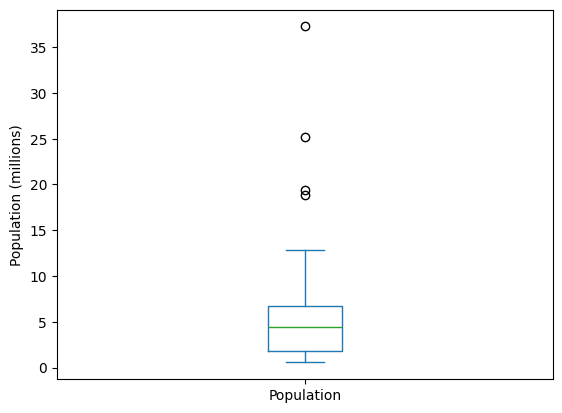

In [6]:
# Plot data
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

Right away, it's evident that the median population of states is roughly 5 million, with approximately half of the states ranging from about 2 million to about 7 million. Additionally, there are a few states with notably higher populations.

### 3. Frequency Tables and Histograms

In [7]:
# Make bins and count frequency
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

Text(0.5, 0, 'Population (millions)')

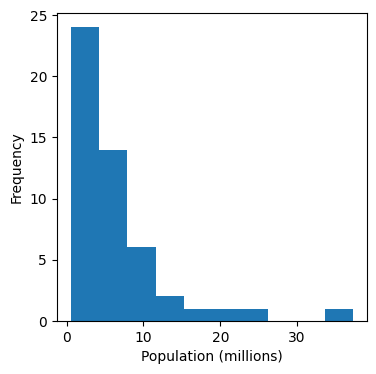

In [8]:
# Plotting a Histogram
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

### 4. Density Plots and Estimates

Text(0.5, 0, 'Murder Rate (per 100,000)')

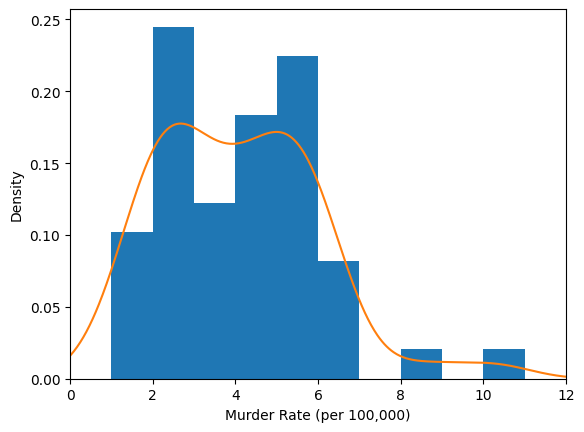

In [9]:
# Show a Histogram and a Density plot
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

## Exploring Binary and Categorical Data
    * Mode
    * Expected value
    * Probability
    * Misleading graphs

In [10]:
# Load in the data
csv_path = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/dfw_airline.csv'

dfw = pd.read_csv(csv_path)

Text(0, 0.5, 'Count')

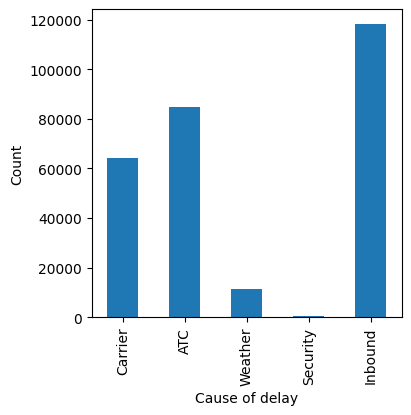

In [11]:
# Plot a bar chart
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

## Correlation

In [12]:
# Import library
import seaborn as sns

# Load in the data
sp500_sector_path = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/sp500_sectors.csv'
sp500_px_path = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/sp500_data.csv.gz'

sp500_sym = pd.read_csv(sp500_sector_path)
sp500_px = pd.read_csv(sp500_px_path, index_col=0)

<Axes: >

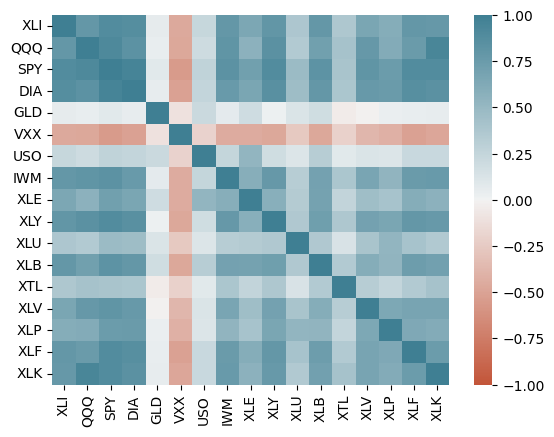

In [13]:
# Plotting a correlation matrix with seaborn heatmap
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
 sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
 cmap=sns.diverging_palette(20, 220, as_cmap=True))

### Scatterplots

In [14]:
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

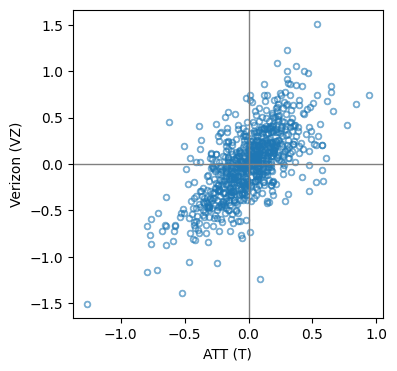

In [15]:
# Plotting the daily autocorrelation in a scatterplot
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

* The returns have a positive relationship
* The stocks go up or go down in tandem (upper-right and lower-left quadrants)
* There are fewer days where one stock goes down significantly while the other stock
goes up, or vice versa (lower-right and upper-left quadrants).

## Exploring two or more variables
    * Hexagonal Binning and Contours
    * Two Categorical variables
    * Visualizing multiple variables

### Hexagonal Binning and Contours

In [16]:
# Load the data
csv_path = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/kc_tax.csv.gz'

kc_tax = pd.read_csv(csv_path)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


Text(0, 0.5, 'Tax-Assessed Value')

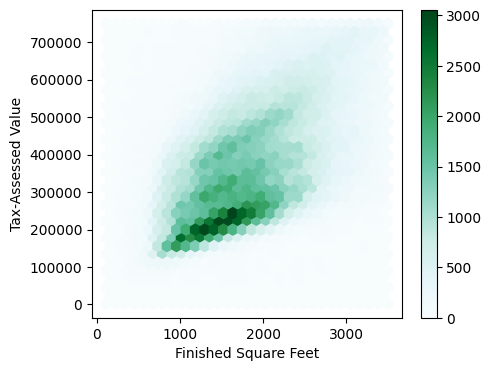

In [17]:
# Plotting a hexbin scatterplot
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
 gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')

ax.set_ylabel('Tax-Assessed Value')

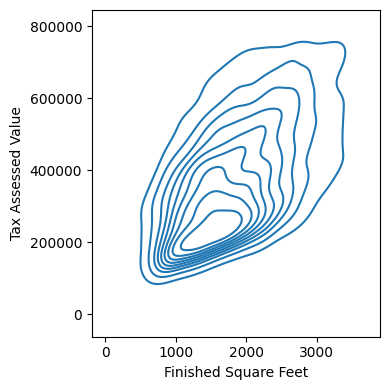

In [18]:
# import library
import matplotlib.pyplot as plt

# Plotting a countour plot
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

### Two Categorical varables
    * Contingency table

In [34]:
# Load the data
csv_path = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/lc_loans.csv'

lc_loans = pd.read_csv(csv_path)

In [35]:
# Plotting a crosstab
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)

df = crosstab.loc['A':'G',:].copy()
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])

perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


C:\Users\ricardo.jaramillo\AppData\Local\Temp\ipykernel_21860\828629775.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0215478  0.04005439 0.04982834 0.06740983 0.08165728 0.1182579
 0.12619562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
C:\Users\ricardo.jaramillo\AppData\Local\Temp\ipykernel_21860\828629775.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69045386 0.70901262 0.73570217 0.71732838 0.70793587 0.65437074
 0.61400802]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
C:\Users\ricardo.jaramillo\AppData\Local\Temp\ipykernel_21860\828629775.py:5: FutureWarning: Se

### Categorical and Numeric data

In [21]:
# Load the data
csv_path = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/airline_stats.csv'

airline_stats = pd.read_csv(csv_path)

Text(0.5, 0.98, '')

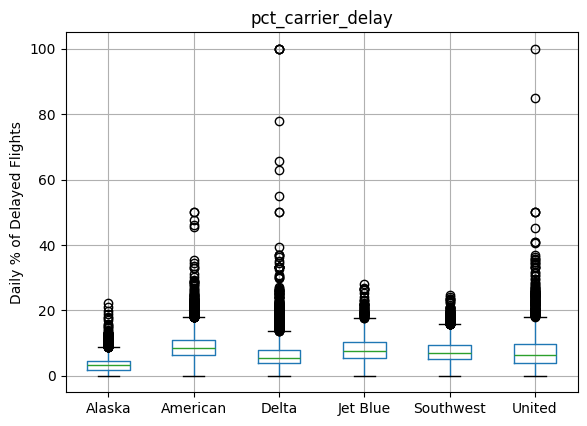

In [22]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')


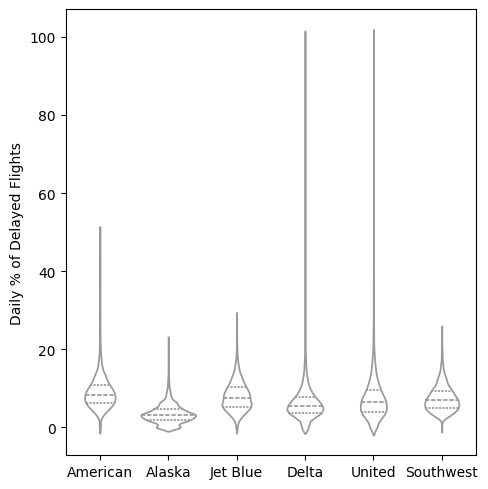

In [44]:
# Violin plot
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay', ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

### Visualizing multiple variables

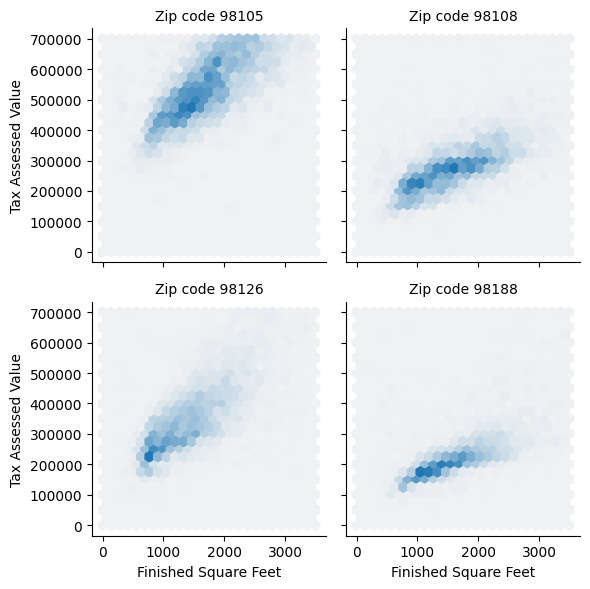

In [51]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()